
# This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [1]:
# required libraries to read the files and manipulations
import pandas as pd
import numpy as np

In [2]:
# reading the csv_files
df = pd.read_csv("C:\\Users\\Shanm\\OneDrive\\Desktop\\twitter_training.csv")

In [3]:
df

2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partition is ...     
74678  Just realized the windows partition of my Mac ...     
74679  Just realized between the windows partition of...     
74680  Just like the windows partition of my Mac is l...     

[74681 rows x 4 columns]

# **Data cleaning is must to find nice insights**

## If we observe the Data Frame the columns are not in right title so we should change the column names for better understanding of Data

In [4]:
df.columns=['User_id','Borderlands','Review','Tweet']
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[74681 rows x 4 columns]

In [5]:
# checking the duplicate values from the data frame
df.duplicated(keep="last").sum()


2700

## In the above cell there are 2700 duplicate values we have to remove duplicates as a main step in Data Cleaning

In [6]:
# Removing the duplicate values from the data frame
df = df.drop_duplicates()


In [7]:
df.duplicated(keep='last').sum()

0

## Now the Duplicates had removed sucessfully

In [8]:
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[71981 rows x 4 columns]

## This is the data frame after removing duplicate values 2700 values are removing

In [9]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_id      71981 non-null  int64 
 1   Borderlands  71981 non-null  object
 2   Review       71981 non-null  object
 3   Tweet        71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [10]:
# finding null/missing values
df.isna().sum()

User_id          0
Borderlands      0
Review           0
Tweet          326
dtype: int64

## In the above cell Tweet column has 326 null Values so we have to Delete or Imputation  in my Obervation deletion of values is better because the data we got is bigger therefore we dont face any problems 

In [11]:
df= df.dropna()

In [12]:
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[71655 rows x 4 columns]

In [13]:
df.isna().sum()

User_id        0
Borderlands    0
Review         0
Tweet          0
dtype: int64

# Null values are deleted

In [14]:
# number of unique values
df.nunique()

User_id        12447
Borderlands       32
Review             4
Tweet          69490
dtype: int64

In [15]:
df.describe()


User_id
count  71655.000000
mean    6436.493559
std     3742.287116
min        1.000000
25%     3199.000000
50%     6433.000000
75%     9604.000000
max    13200.000000

In [16]:
# final data frame shape
df.shape

(71655, 4)

In [17]:
# again transforming to CSV file  
df.to_csv("cleaned_twitter_data.csv")

#  Exploratory Data Analysis (EDA)

In [18]:
# import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

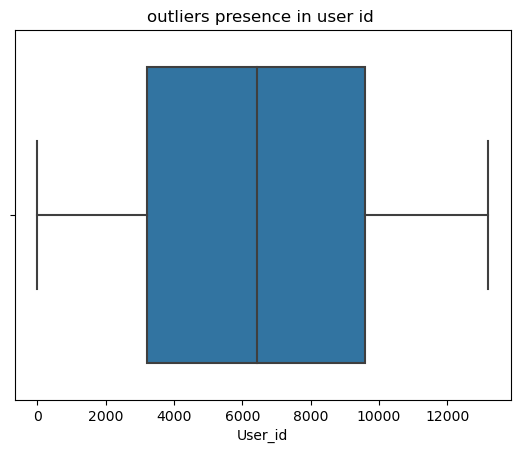

In [19]:
sns.boxplot(data=df,x='User_id')
plt.title("outliers presence in user id ")
plt.show()

In [20]:
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[71655 rows x 4 columns]

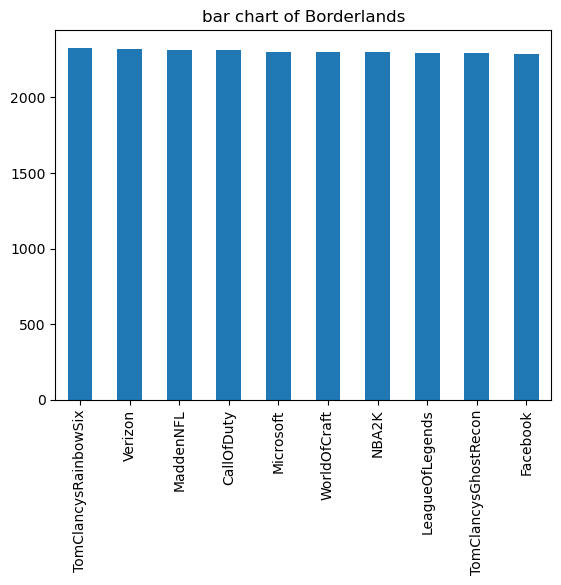

In [21]:
df["Borderlands"].value_counts()[:10].plot(kind="bar")
plt.title("bar chart of Borderlands")
plt.show()

In [22]:
df["Borderlands"].nunique()

32

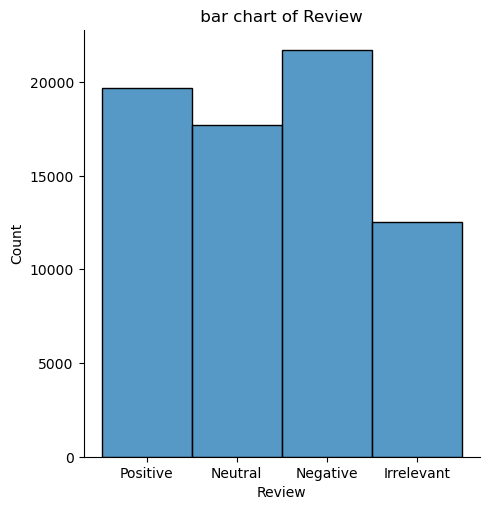

In [23]:
sns.displot(data=df,x="Review")
plt.title(" bar chart of Review ")
plt.show()

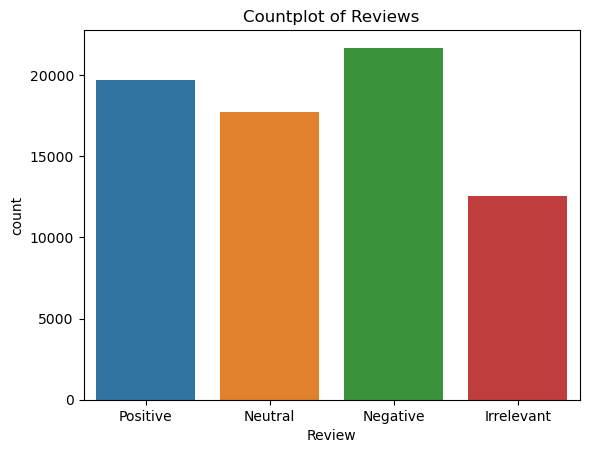

In [24]:
sns.countplot(data=df,x='Review')
plt.title('Countplot of Reviews' )
plt.show()

## From the above plot we have 4 types of reviews i.e
### 1.Positive
### 2. Negative
### 3. Neutral 
### 4. Irrelevant
## Negative Reviews are high in number compared with other Reviews

In [25]:
df["Review"].value_counts()


Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: Review, dtype: int64

# We have cleaned the Data now its time to Build the Model 

In [26]:
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[71655 rows x 4 columns]

In [27]:
# step 1
X = df[["Tweet"]]  #input variable
y = df["Review"]    # Target variable

In [28]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [29]:
X.head()


Tweet
0  I am coming to the borders and I will kill you...
1  im getting on borderlands and i will kill you ...
2  im coming on borderlands and i will murder you...
3  im getting on borderlands 2 and i will murder ...
4  im getting into borderlands and i can murder y...

In [30]:
y.head()


0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Review, dtype: object

In [31]:
# split the data train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(53741, 1) (53741,)
(17914, 1) (17914,)


# Text Data Preprocessing Stage

In [32]:
X_train.head()


Tweet
8241   . 14 @TPAIN..... all Come @PlayOverwatch down ...
54802  Dead of the night and ancient evil are both at...
65888  Thank you @ginarush for your tireless support ...
71274  @ GhostRecon I love Ghost Recon so much I just...
60433  Get a stunning delivery video that really sell...

In [33]:
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shanm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
nltk.download("omw-1.4")


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shanm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
# object creation
stemmer = PorterStemmer()

In [37]:
lemmatizer = WordNetLemmatizer()


In [38]:
# text data preparation
def process(Raw_data,flag):

  # removing of special characters
    sentence = re.sub("[^a-zA-Z]"," ",Raw_data)
  # convert to lower case charcters
    sentence = sentence.lower()
  # split into words
    token = sentence.split()
  # applying stopwords
    clean_token = [ word for word in token if word not in stopwords.words("english") ]

  # applying flag [stemmer,lemmatizer]
    if flag==stemmer:
        clean_token = [stemmer.stem(word) for word in clean_token]
    else:
        clean_token=[lemmatizer.lemmatize(word) for word in clean_token]
    return pd.Series([" ".join(clean_token), len(clean_token)])


In [39]:
from tqdm import tqdm, tqdm_notebook


In [40]:
tqdm.pandas()


In [41]:
df

User_id  Borderlands    Review  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[71655 rows x 4 columns]

In [42]:
#  [ applying lemmalizer]
temp_df = X_train['Tweet'].progress_apply(lambda x: process(x,'lemm'))

temp_df.head()

100%|███████████████████████████████████████████████████████████████████████████| 53741/53741 [08:20<00:00, 107.32it/s]


0   1
8241         tpain come playoverwatch u mad luv ready ya   8
54802  dead night ancient evil bottom also kino top l...  12
65888  thank ginarush tireless support patient injure...   7
71274  ghostrecon love ghost recon much want cool cha...  20
60433  get stunning delivery video really sell facebo...   8

In [43]:
temp_df.columns=["clean_text_lemm","text_len_lemm"]
temp_df.head()

clean_text_lemm  text_len_lemm
8241         tpain come playoverwatch u mad luv ready ya              8
54802  dead night ancient evil bottom also kino top l...             12
65888  thank ginarush tireless support patient injure...              7
71274  ghostrecon love ghost recon much want cool cha...             20
60433  get stunning delivery video really sell facebo...              8

In [44]:
X_train =pd.concat([X_train,temp_df],axis=1)
X_train.head()


Tweet  \
8241   . 14 @TPAIN..... all Come @PlayOverwatch down ...   
54802  Dead of the night and ancient evil are both at...   
65888  Thank you @ginarush for your tireless support ...   
71274  @ GhostRecon I love Ghost Recon so much I just...   
60433  Get a stunning delivery video that really sell...   

                                         clean_text_lemm  text_len_lemm  
8241         tpain come playoverwatch u mad luv ready ya              8  
54802  dead night ancient evil bottom also kino top l...             12  
65888  thank ginarush tireless support patient injure...              7  
71274  ghostrecon love ghost recon much want cool cha...             20  
60433  get stunning delivery video really sell facebo...              8

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X_train_transform = vector.fit_transform(temp_df["clean_text_lemm"])

#**creating word cloud**

In [46]:
from wordcloud import wordcloud


In [47]:
y_train.head()


8241     Irrelevant
54802      Negative
65888      Positive
71274      Positive
60433       Neutral
Name: Review, dtype: object

In [48]:
positive_df=X_train.loc[y_train=="Positive",:]
positive_df.head()

Tweet  \
65888  Thank you @ginarush for your tireless support ...   
71274  @ GhostRecon I love Ghost Recon so much I just...   
41852  Found Battlefield 1 and Titanfall 2 with all t...   
6422   @PAYBACKIndia WooHoo!!!. <unk> have awarded an...   
26700  Nice to take a bow.. That's my credo Creepypas...   

                                         clean_text_lemm  text_len_lemm  
65888  thank ginarush tireless support patient injure...              7  
71274  ghostrecon love ghost recon much want cool cha...             20  
41852  found battlefield titanfall dlc game definitel...              9  
6422   paybackindia woohoo unk awarded amazon e vouch...             11  
26700  nice take bow credo creepypasta assassin oc lo...             21

In [49]:
words = ' '.join(positive_df['clean_text_lemm'])

print(words[:100])

thank ginarush tireless support patient injured unk ghostrecon love ghost recon much want cool chara


In [88]:
clean_word=' '.join([word for word in words.split() if 'http' not in word])


In [89]:
positive_df_wordcloud=wordcloud.WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)
positive_df_wordcloud

# positive tweet wordcloud plot


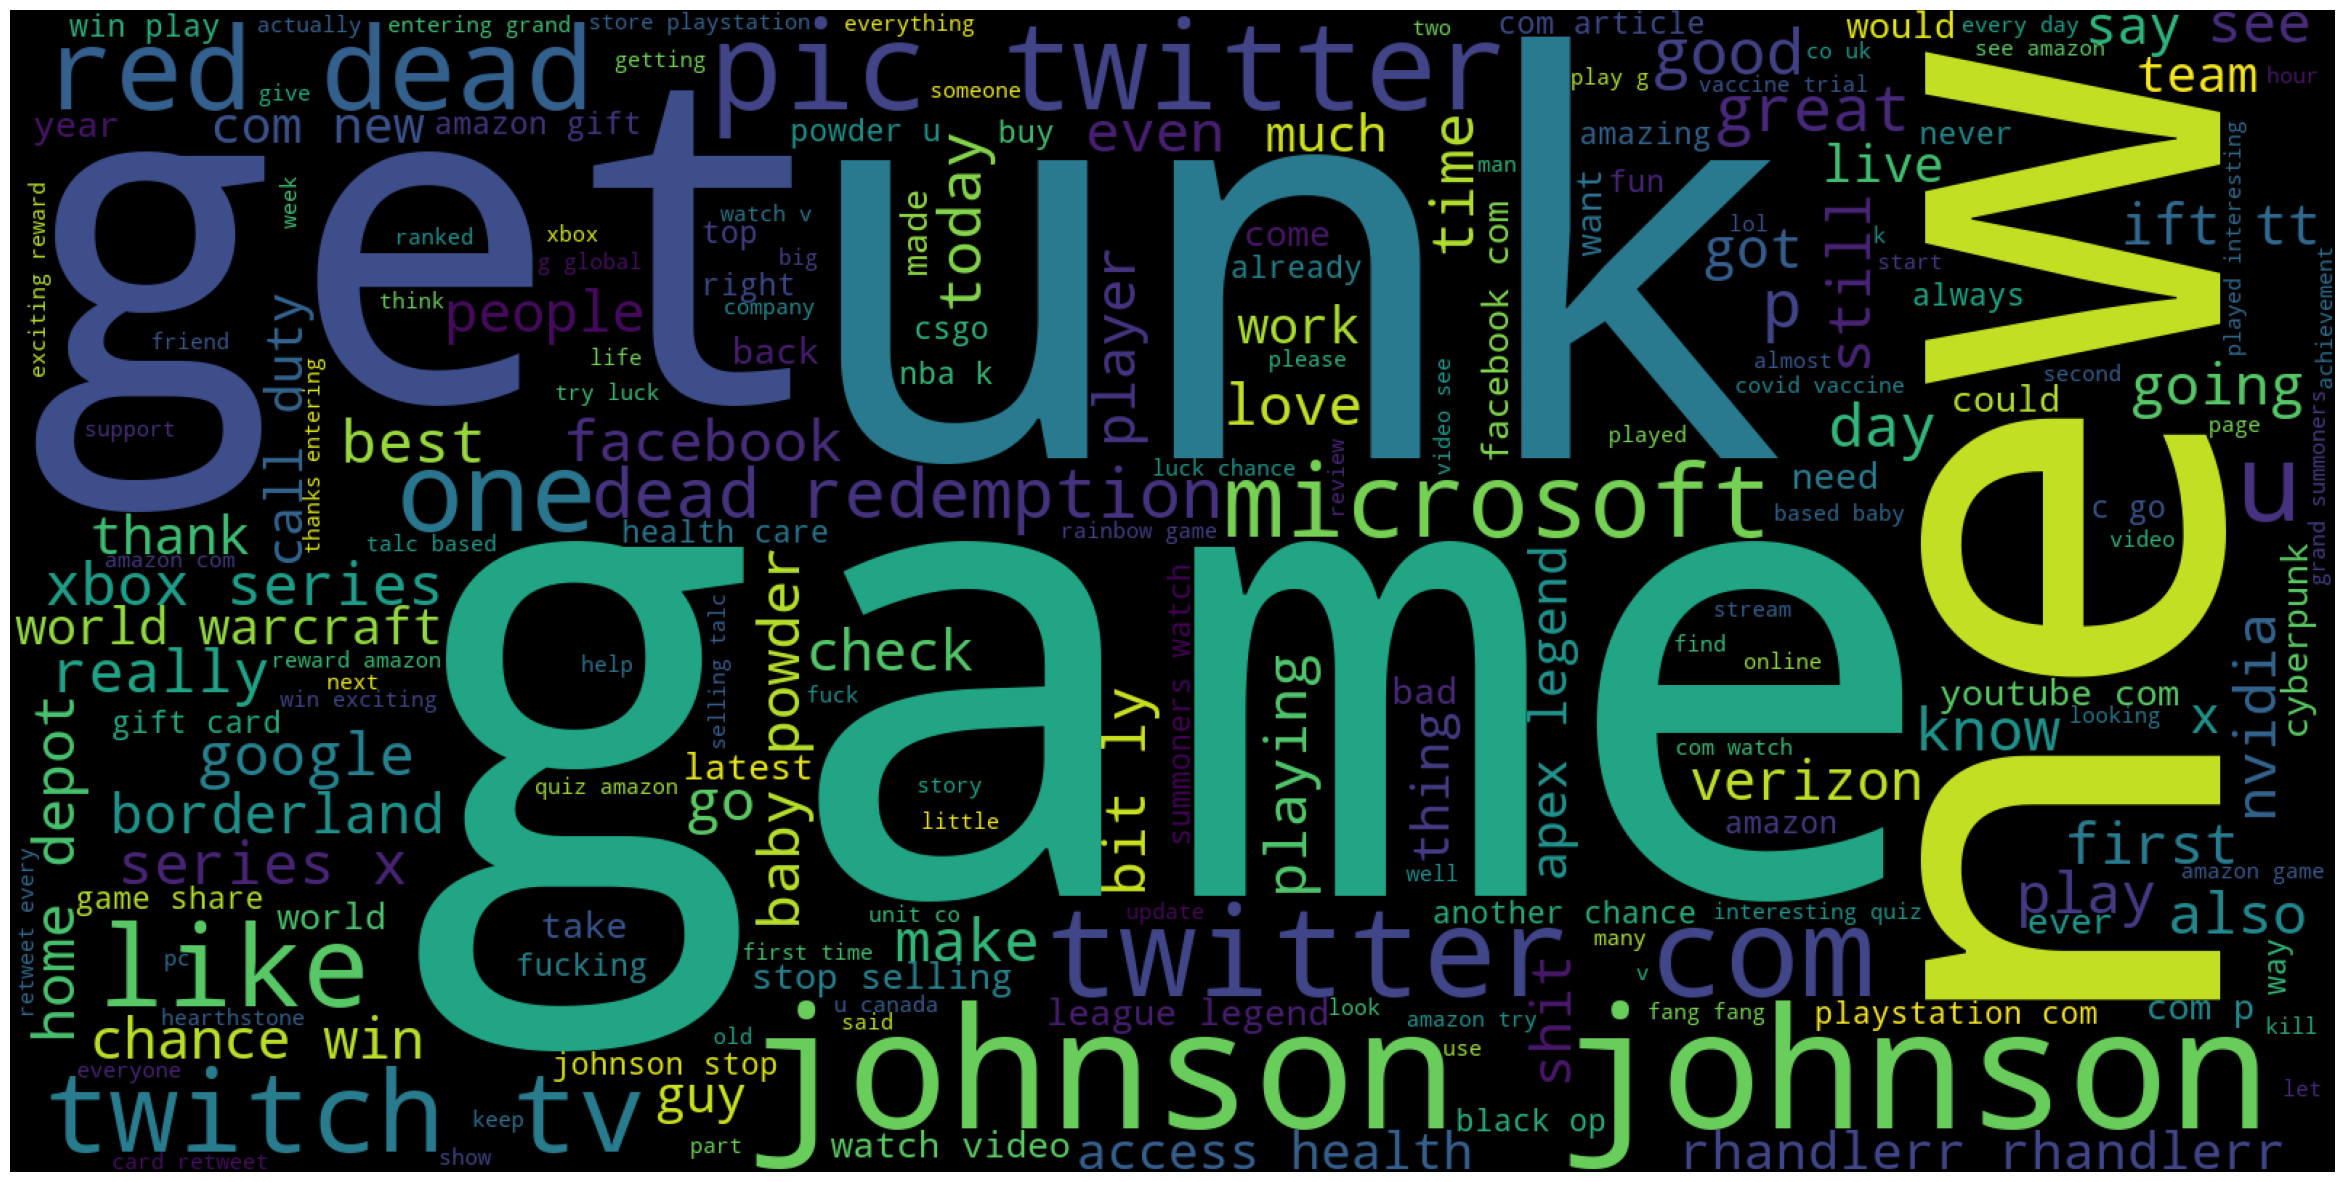

In [90]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_df_wordcloud)
plt.axis('off')
plt.show()

In [53]:
Negative_df=X_train.loc[y_train=="Negative",:]
Negative_df.head()

Tweet  \
54802  Dead of the night and ancient evil are both at...   
10665  ... bruh if Xbox Series or X game cases actual...   
9172   *opens overwatch to play for kids first Xbox i...   
57969  1 RhandlerR RhandlerR RhandlerR RhandlerR I LO...   
6037   I mean really what I'm saying with this post i...   

                                         clean_text_lemm  text_len_lemm  
54802  dead night ancient evil bottom also kino top l...             12  
10665  bruh xbox series x game case actually look lik...             17  
9172   open overwatch play kid first xbox week open a...             22  
57969  rhandlerr rhandlerr rhandlerr rhandlerr lost o...             19  
6037   mean really saying post amazon evil research o...             16

In [54]:
words = ' '.join(Negative_df['clean_text_lemm'])

print(words[:100])

dead night ancient evil bottom also kino top list dead map honestly bruh xbox series x game case act


In [55]:
clean_word=' '.join([word for word in words.split() if 'br'  not in word])


In [56]:
Negative_wordcloud=wordcloud.WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)

# Negative score wordcloud plot


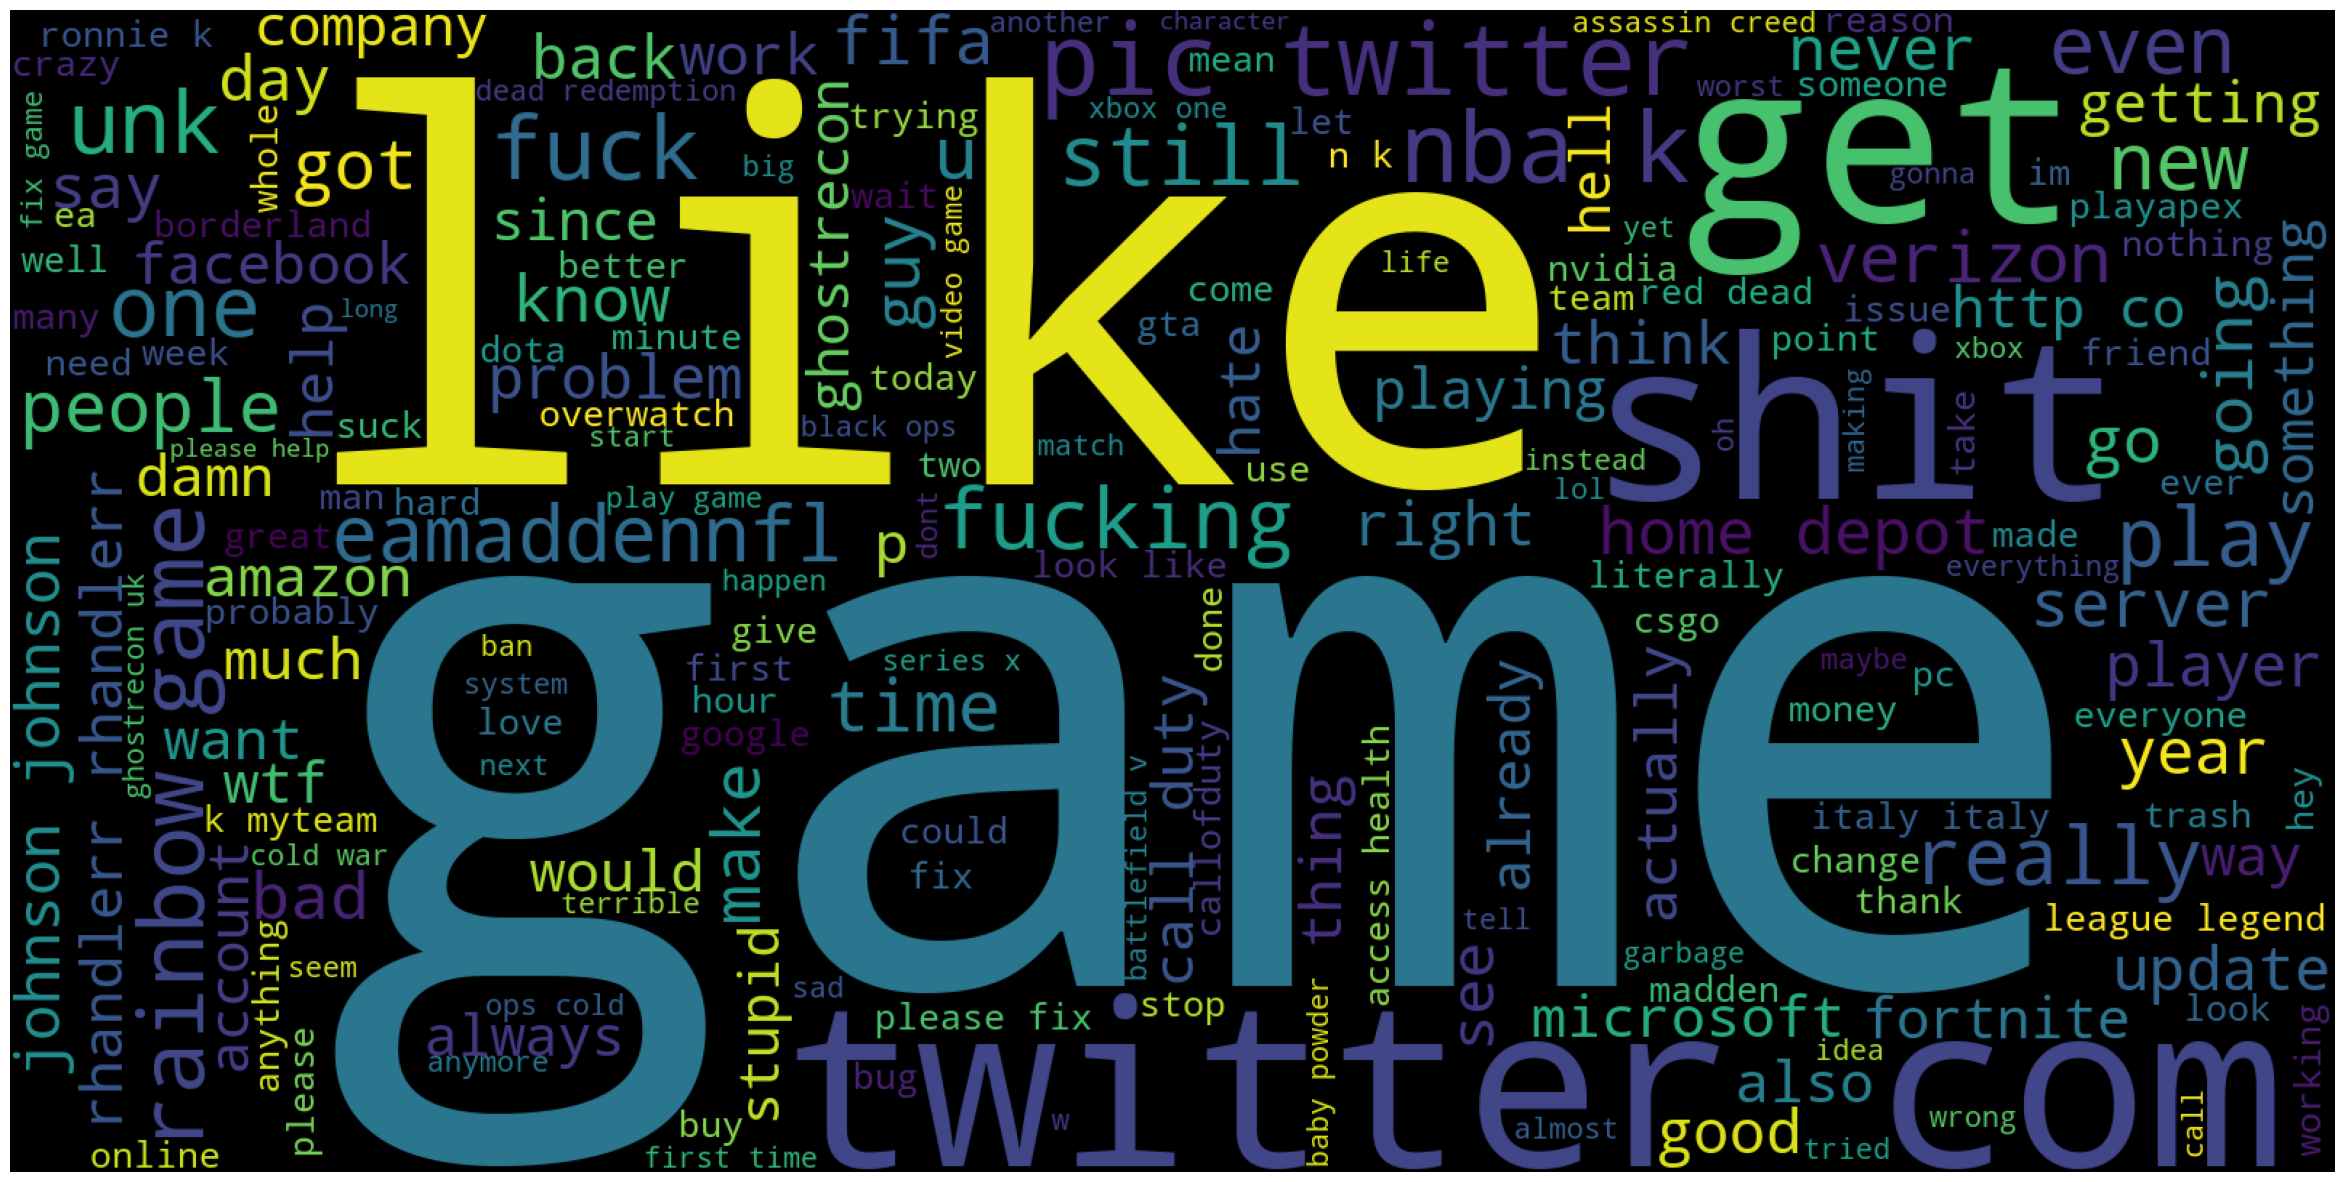

In [57]:
plt.figure(1,figsize=(30,20))
plt.imshow(Negative_wordcloud)
plt.axis('off')
plt.show()

In [75]:
Neutral_df=X_train.loc[y_train=="Neutral",:]
Neutral_df.head()

Tweet  \
60433  Get a stunning delivery video that really sell...   
29594           We need a third for Ranked right though!   
67092  Johnson & Johnson will stop using talc in its ...   
73060  .. Compare this amazing 'Mi Notebook with Inte...   
15131  BTS Pro Series Season 3 SEA: BOOM Esports beco...   

                                         clean_text_lemm  text_len_lemm  
60433  get stunning delivery video really sell facebo...              8  
29594                     need third ranked right though              5  
67092  johnson johnson stop using talc baby powder pr...             18  
73060  compare amazing mi notebook intel table u ultr...             34  
15131  bts pro series season sea boom esports become ...             24

In [76]:
words = ' '.join(Neutral_df['clean_text_lemm'])

print(words[:100])

get stunning delivery video really sell facebook instagram need third ranked right though johnson jo


In [82]:
clean_word=' '.join([word for word in words.split() if 'http'  not in word])

In [83]:
Neutral_wordcloud=wordcloud.WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)

# Neutral score Wordcloud plot

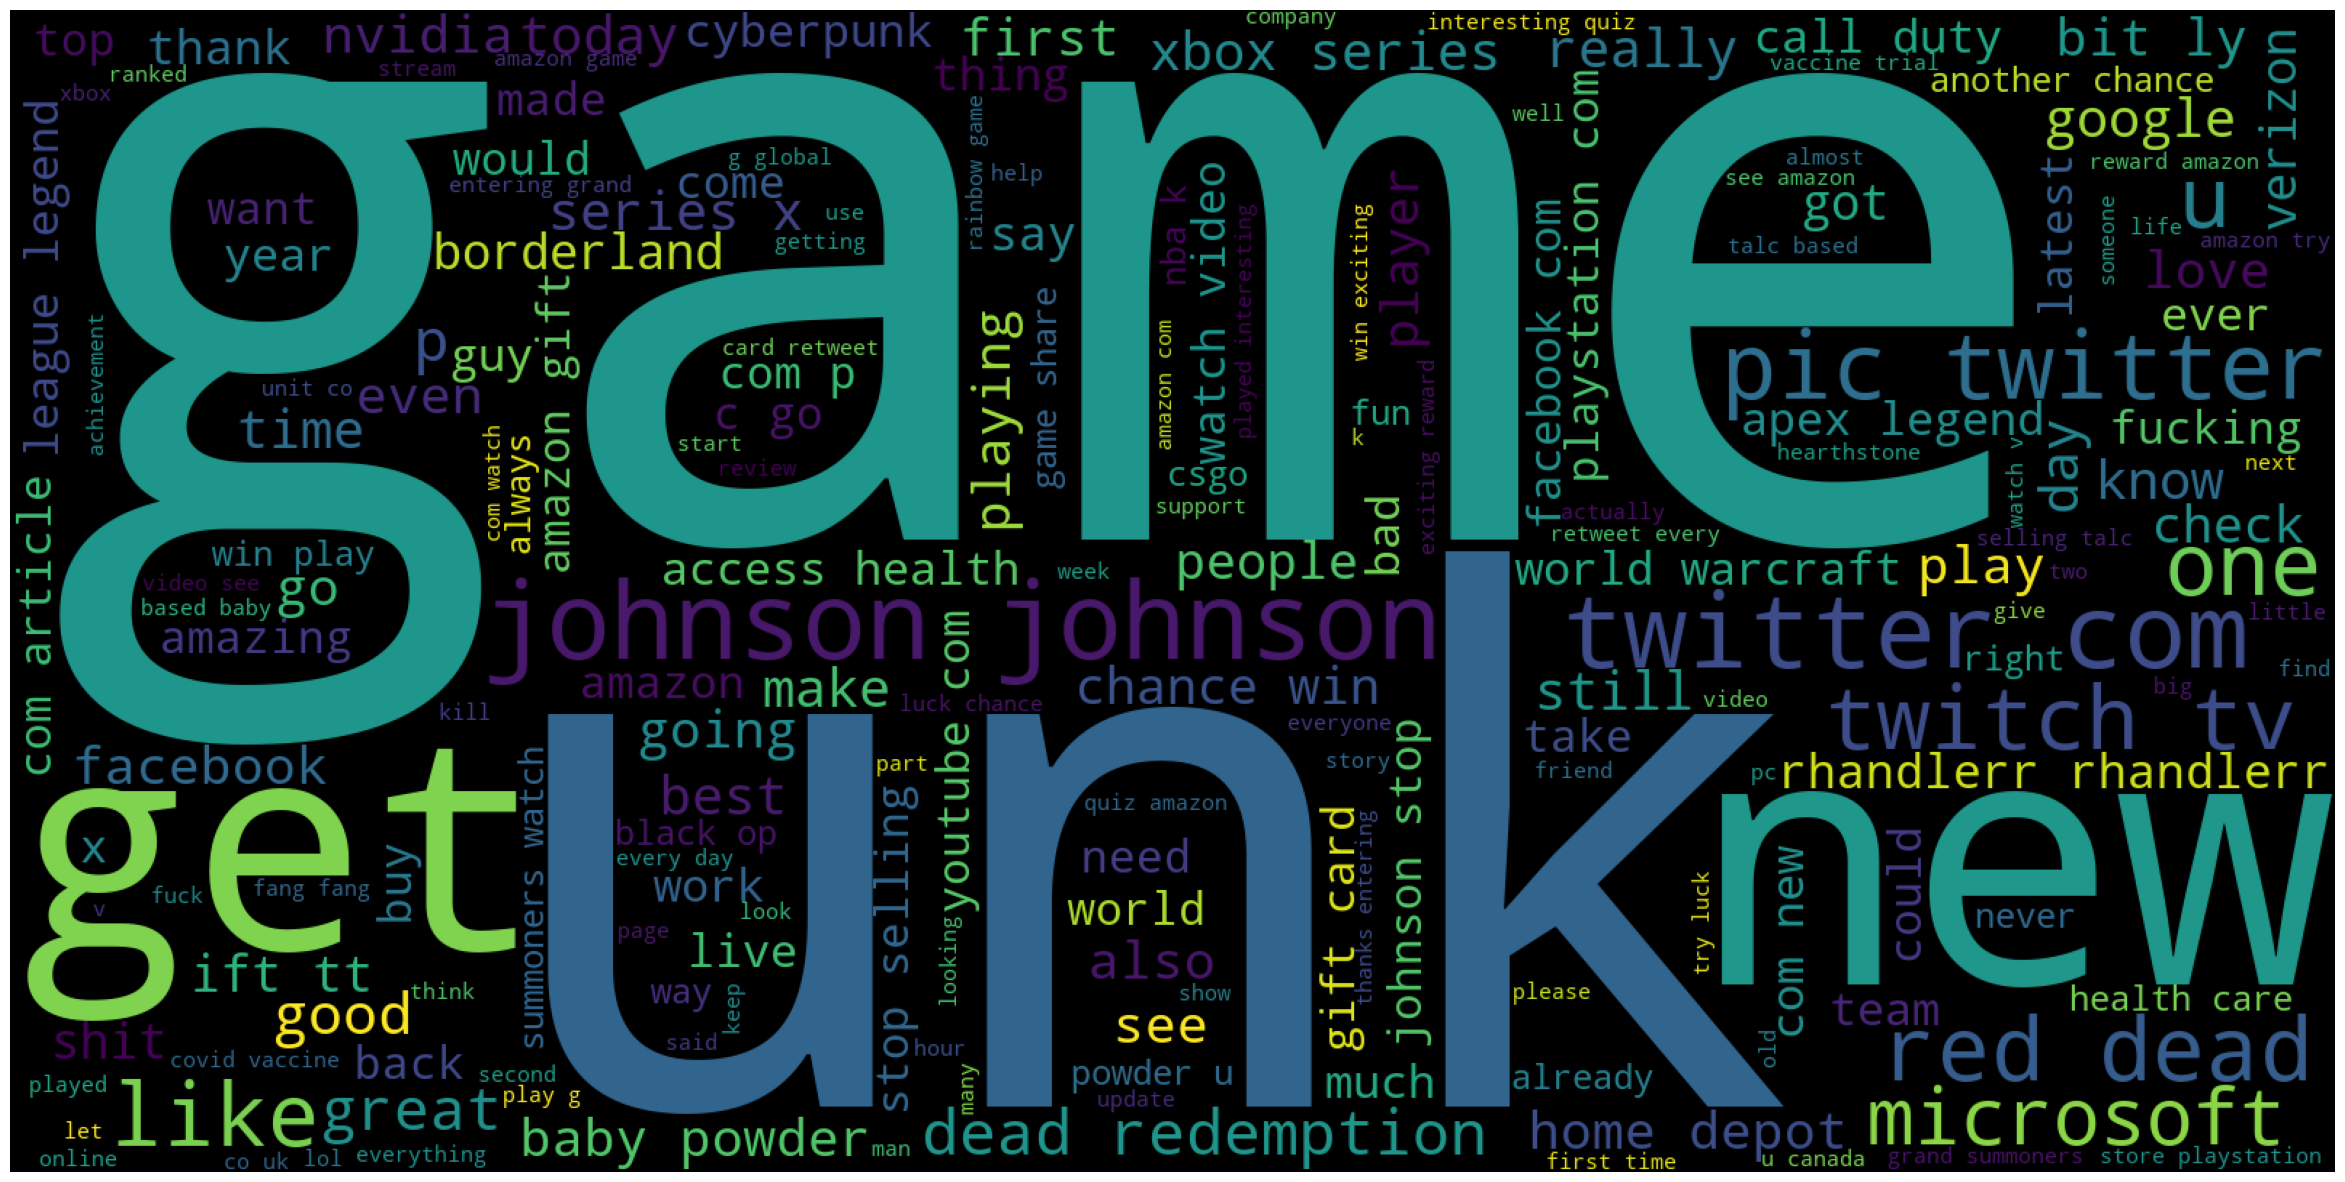

In [84]:
plt.figure(1,figsize=(30,20))
plt.imshow(Neutral_wordcloud)
plt.axis('off')
plt.show()

In [58]:
X_test

Tweet
55703  Call Of Duty Warzone Server Down Status update...
28884  Check out this great streamer and don't forget...
10604                                 Wait this big hype
17227                            Omg this looks amazing.
49538     I never spend my money on fifa points anyways.
...                                                  ...
34313                 NOT FREE TO USE !!!! Recent work  
10200  The latest Discountgadgets.co.uk Consumer Elec...
8013   ... What colour is in that melody???.. Really ...
44202  Great breakthrough! Tik tok and 59 Chinese app...
61113  Wow Franklin in GTA V really kinda gets out co...

[17914 rows x 1 columns]

In [59]:
# step 3 test data preprocessing
temp_df1 =X_test["Tweet"].progress_apply(lambda x: process (x,"lemm"))
temp_df1.head()


100%|███████████████████████████████████████████████████████████████████████████| 17914/17914 [02:37<00:00, 113.63it/s]


0   1
55703  call duty warzone server status update unable ...  19
28884            check great streamer forget send follow   6
10604                                      wait big hype   3
17227                                   omg look amazing   3
49538               never spend money fifa point anyways   6

In [60]:
temp_df1.columns=['clean_text_lemm','clean_len_lemm']
temp_df1.head()

clean_text_lemm  clean_len_lemm
55703  call duty warzone server status update unable ...              19
28884            check great streamer forget send follow               6
10604                                      wait big hype               3
17227                                   omg look amazing               3
49538               never spend money fifa point anyways               6

In [61]:
X_test=pd.concat([X_test,temp_df1],axis=1)
X_test.head()


Tweet  \
55703  Call Of Duty Warzone Server Down Status update...   
28884  Check out this great streamer and don't forget...   
10604                                 Wait this big hype   
17227                            Omg this looks amazing.   
49538     I never spend my money on fifa points anyways.   

                                         clean_text_lemm  clean_len_lemm  
55703  call duty warzone server status update unable ...              19  
28884            check great streamer forget send follow               6  
10604                                      wait big hype               3  
17227                                   omg look amazing               3  
49538               never spend money fifa point anyways               6

In [62]:
X_test_transform=vector.transform(X_test['clean_text_lemm'])

In [63]:
X_test_transform.shape

(17914, 25263)

In [64]:
X_train_transform.shape

(53741, 25263)

# Model Building

# Logestic Regression Algorithm Model

In [65]:
# step-4   [Bulding model]
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

# step 6
y_test_predict=reg.predict(X_test_transform)

xtrain_predict=

# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

E:\Annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8155074243608351
class :               precision    recall  f1-score   support

  Irrelevant       0.85      0.75      0.80      3186
    Negative       0.84      0.85      0.84      5491
     Neutral       0.85      0.78      0.81      4367
    Positive       0.75      0.86      0.80      4870

    accuracy                           0.82     17914
   macro avg       0.82      0.81      0.81     17914
weighted avg       0.82      0.82      0.82     17914



# evaluation of train data

In [91]:


# step 6
y_train_predict_l=reg.predict(X_train_transform)


# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_train,y_train_predict_l))
print("class :",classification_report(y_train,y_train_predict_l))

E:\Annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8416106883012969
class :               precision    recall  f1-score   support

  Irrelevant       0.89      0.77      0.83      9351
    Negative       0.81      0.90      0.85     16207
     Neutral       0.88      0.81      0.84     13341
    Positive       0.83      0.85      0.84     14842

    accuracy                           0.84     53741
   macro avg       0.85      0.83      0.84     53741
weighted avg       0.84      0.84      0.84     53741



# While comparing Train Data accuracy and Test data accuracy this model is the best model 

# KNN classifier Algorithm Model


In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_predict=classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accuracy: 0.8821033828290722
class :               precision    recall  f1-score   support

  Irrelevant       0.92      0.83      0.88      3186
    Negative       0.85      0.93      0.88      5491
     Neutral       0.90      0.87      0.88      4367
    Positive       0.88      0.88      0.88      4870

    accuracy                           0.88     17914
   macro avg       0.89      0.88      0.88     17914
weighted avg       0.88      0.88      0.88     17914



In [93]:
y_train_predict_knn=reg.predict(X_train_transform)


# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_train,y_train_predict_knn))
print("class :",classification_report(y_train,y_train_predict_knn))

accuracy: 0.8416106883012969
class :               precision    recall  f1-score   support

  Irrelevant       0.89      0.77      0.83      9351
    Negative       0.81      0.90      0.85     16207
     Neutral       0.88      0.81      0.84     13341
    Positive       0.83      0.85      0.84     14842

    accuracy                           0.84     53741
   macro avg       0.85      0.83      0.84     53741
weighted avg       0.84      0.84      0.84     53741



# Decision tree Algorithm Model


In [101]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_predict =classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accuracy: 0.5929440660935581
class :               precision    recall  f1-score   support

  Irrelevant       0.57      0.47      0.52      3186
    Negative       0.65      0.63      0.64      5491
     Neutral       0.61      0.58      0.60      4367
    Positive       0.54      0.65      0.59      4870

    accuracy                           0.59     17914
   macro avg       0.59      0.58      0.58     17914
weighted avg       0.60      0.59      0.59     17914



In [100]:
y_train_predict_dec=reg.predict(X_train_transform)


# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_train,y_train_predict_dec))
print("class :",classification_report(y_train,y_train_predict_dec))

accuracy: 0.9745073593718018
class :               precision    recall  f1-score   support

  Irrelevant       0.99      0.97      0.98      9351
    Negative       0.99      0.97      0.98     16207
     Neutral       0.98      0.97      0.98     13341
    Positive       0.94      0.99      0.96     14842

    accuracy                           0.97     53741
   macro avg       0.98      0.97      0.98     53741
weighted avg       0.98      0.97      0.97     53741



# While comparing Train Data accuracy and Test data accuracy this model is underfitting model

# Random forest Algorithm Model

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_predict =classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))


accuracy: 0.9024785084291616
class :               precision    recall  f1-score   support

  Irrelevant       0.95      0.84      0.89      3186
    Negative       0.92      0.92      0.92      5491
     Neutral       0.94      0.88      0.91      4367
    Positive       0.84      0.94      0.88      4870

    accuracy                           0.90     17914
   macro avg       0.91      0.90      0.90     17914
weighted avg       0.91      0.90      0.90     17914



# Support vector machine Algorithm Model

In [69]:
from sklearn.svm  import SVC
classifier = SVC()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_predict =classifier.predict(X_test_transform)
# step 7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accuracy: 0.8589371441330803
class :               precision    recall  f1-score   support

  Irrelevant       0.95      0.76      0.84      3186
    Negative       0.87      0.90      0.88      5491
     Neutral       0.93      0.81      0.87      4367
    Positive       0.77      0.92      0.84      4870

    accuracy                           0.86     17914
   macro avg       0.88      0.85      0.86     17914
weighted avg       0.87      0.86      0.86     17914



# Naive bayes Algorithm Model

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_transform,y_train)

# step 6
y_test_predict =nb.predict(X_test_transform)
# step 7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accuracy: 0.7422686167243496
class :               precision    recall  f1-score   support

  Irrelevant       0.82      0.62      0.71      3186
    Negative       0.70      0.84      0.76      5491
     Neutral       0.81      0.65      0.72      4367
    Positive       0.71      0.79      0.75      4870

    accuracy                           0.74     17914
   macro avg       0.76      0.73      0.74     17914
weighted avg       0.75      0.74      0.74     17914



# Applying TFIDF text transform technique

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X_train_transform=vector.fit_transform(X_train['clean_text_lemm'])

# Logistic regression model

In [72]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transform,y_train)

# step 6
y_test_pred_l =reg.predict(X_test_transform)
# step 7

from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_pred_l))
print("class :",classification_report(y_test,y_test_pred_l))

E:\Annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.7081612146924193
class :               precision    recall  f1-score   support

  Irrelevant       0.74      0.57      0.64      3186
    Negative       0.71      0.80      0.75      5491
     Neutral       0.72      0.65      0.68      4367
    Positive       0.69      0.74      0.72      4870

    accuracy                           0.71     17914
   macro avg       0.71      0.69      0.70     17914
weighted avg       0.71      0.71      0.71     17914



# Decision tree Algorithm Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

# step 6
y_test_pred_d =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_d))
print("class :",classification_report(y_test,y_test_pred_d))

accuracy: 0.5895389081165568
class :               precision    recall  f1-score   support

  Irrelevant       0.54      0.46      0.50      3186
    Negative       0.66      0.62      0.64      5491
     Neutral       0.59      0.58      0.58      4367
    Positive       0.55      0.65      0.60      4870

    accuracy                           0.59     17914
   macro avg       0.59      0.58      0.58     17914
weighted avg       0.59      0.59      0.59     17914



# Random Forest Algorithm Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_transform,y_train)

# step 6
y_test_pred_r =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_r))
print("class :",classification_report(y_test,y_test_pred_r))

accuracy: 0.8278441442447247
class :               precision    recall  f1-score   support

  Irrelevant       0.91      0.71      0.80      3186
    Negative       0.83      0.89      0.86      5491
     Neutral       0.90      0.76      0.83      4367
    Positive       0.74      0.90      0.81      4870

    accuracy                           0.83     17914
   macro avg       0.85      0.81      0.82     17914
weighted avg       0.84      0.83      0.83     17914



# As compared with different types of Algorithm Models According to me Random Forest Algorithm Model and  Logestic Regression Algorithm Model gives Best Accuracy with 90 and 81 percentage

# The percentages for individual models are

## Logestic Regression Algorithm Model = 0.8155074243608351 

## KNN classifier Algorithm Model = 0.8401808641286145 

## Decision tree Algorithm Model =  0.5929440660935581

## Random forest Algorithm Model = 0.9023110416434074

## Support vector machine Algorithm Model = 0.8589371441330803

## Naive bayes Algorithm Model = 0.7422686167243496 

